In [40]:
import tensorflow as tf
print(tf.__version__)


2.14.0


In [41]:
## import some basics libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [43]:
# Devide the dataset into independent and dependent variable
X = data.iloc[: , 3: 13]
y = data.iloc[ : , 13]

In [44]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [45]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [46]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [47]:
## Feature Engineering
geo =pd.get_dummies(X['Geography'],drop_first = True)
gender = pd.get_dummies(X['Gender'],drop_first = True)

In [48]:
X.drop(['Geography','Gender'], axis = 1,inplace = True)

In [49]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [50]:
X = pd.concat([X,geo,gender],axis = 1)

In [51]:
## Spliting the dataset into Training and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [52]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
7389,667,34,5,0.00,2,1,0,163830.64,0,1,0
9275,427,42,1,75681.52,1,1,1,57098.00,1,0,1
2995,535,29,2,112367.34,1,1,0,185630.76,0,0,0
5316,654,40,5,105683.63,1,1,0,173617.09,0,1,1
356,850,57,8,126776.30,2,1,1,132298.49,0,1,0


In [53]:
# feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [54]:
X_train.shape

(8000, 11)

In [55]:
X_test.shape

(2000, 11)

In [56]:
## Now create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, LeakyReLU
from tensorflow.keras.layers import Dropout

In [57]:
### Lets initialize the ANN
classifier = Sequential()

In [58]:
## Adding the input Layer
classifier.add(Dense(units = 11,activation = 'relu'))
## Adding first hidden layer
classifier.add(Dense(units = 7, activation= 'relu'))
classifier.add(Dropout(0.2))
## Adding Second hidden layer
classifier.add(Dense(units = 6,activation = 'relu'))
classifier.add(Dropout(0.2))
## Adding the Output layer
classifier.add(Dense(1,activation = 'sigmoid'))


In [59]:
classifier.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'])

In [60]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [61]:
## Early Stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
)

In [62]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks = early_stopping)

Epoch 1/1000
536/536 [==============================] - 6s 7ms/step - loss: 0.4561 - accuracy: 0.7983 - val_loss: 0.3879 - val_accuracy: 0.8201
Epoch 2/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3959 - accuracy: 0.8337 - val_loss: 0.3802 - val_accuracy: 0.8417
Epoch 3/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3861 - accuracy: 0.8334 - val_loss: 0.3816 - val_accuracy: 0.8345
Epoch 4/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3812 - accuracy: 0.8378 - val_loss: 0.3986 - val_accuracy: 0.8133
Epoch 5/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3748 - accuracy: 0.8423 - val_loss: 0.3699 - val_accuracy: 0.8459
Epoch 6/1000
536/536 [==============================] - 4s 8ms/step - loss: 0.3725 - accuracy: 0.8455 - val_loss: 0.3824 - val_accuracy: 0.8410
Epoch 7/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3699 - accuracy: 0.8470 - val_loss: 0.3710 - val_accuracy:

In [63]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

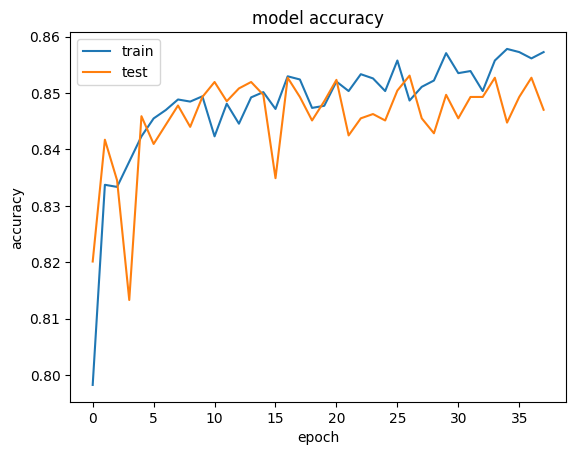

In [64]:
# Summarise history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

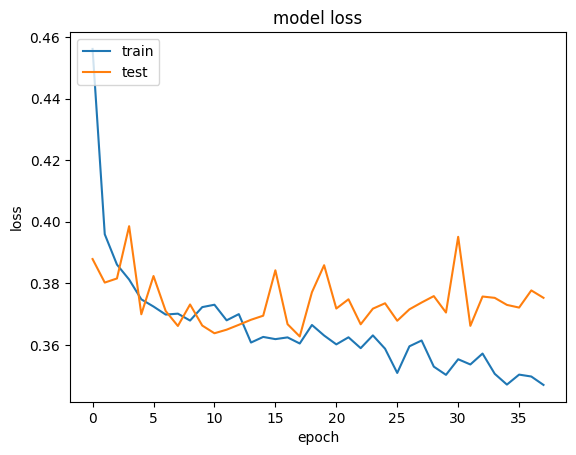

In [65]:
## Summarise history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [66]:
## Part 3, Making Pridictions and evaluting the model
# Pridicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 2ms/step


In [67]:
## Make the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1561,   34],
       [ 243,  162]])